In [60]:
import os
# Отключает все логи TensorFlow (0 - все, 1 - предупреждения, 2 - ошибки, 3 - критичные ошибки)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [61]:
from sklearn import datasets
import pandas as pd
import numpy as np
from typing import List, Union
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import shap

# Загружаем данные и проверяем их

In [3]:
df_original = pd.read_csv('content/boston_dataset.csv', sep=r'\s+', header=None, engine='python')

In [4]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df_original

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
df_original.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
# Строим корреляционную матрицу

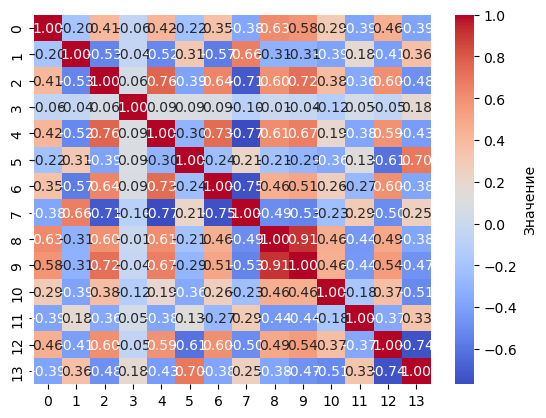

In [7]:
sns.heatmap(df_original.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Значение'})
plt.show()

## В качестве целевыйх данных выбираем столбце 13. В качестве фичей выбираем все столюцы кроме 3 и 7 (в силу низкой корреляции)

In [8]:
X = df_original.drop(columns=[3,7,13])  
y = df_original[13] 

In [9]:
# Разбиваем данные на тестовые и валидационные
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                  random_state=42)


In [10]:
# Нормируем данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [11]:
# Создаём модель
model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)), # Входной слой
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой
])

# Компиляция модели
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# История обучения хранится в объекте history
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=64, 
                    validation_data=(X_val_scaled, y_val), verbose=1)

# Оценка на тесте
test_loss, test_mae = model.evaluate(X_val_scaled, y_val, verbose=1)
print("\nСредняя абсолютная ошибка (MAE):", test_mae)

I0000 00:00:1741784757.391703   89590 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741784759.012560   89590 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741784759.012866   89590 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1741784759.030783   89590 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

Epoch 1/100


I0000 00:00:1741784763.010790   89693 service.cc:146] XLA service 0x77fc80005f80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741784763.010815   89693 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2025-03-12 16:06:03.044045: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-12 16:06:03.144346: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90101


4/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 622.8113 - mae: 23.0471

I0000 00:00:1741784764.168030   89693 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - loss: 610.8619 - mae: 22.8519 - val_loss: 506.8640 - val_mae: 20.8812
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 551.5059 - mae: 21.7403 - val_loss: 487.1054 - val_mae: 20.4276
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 557.1100 - mae: 21.5986 - val_loss: 465.4317 - val_mae: 19.9264
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 549.4368 - mae: 21.4491 - val_loss: 440.7838 - val_mae: 19.3455
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 487.3978 - mae: 20.1357 - val_loss: 412.4684 - val_mae: 18.6588
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 463.7214 - mae: 19.6310 - val_loss: 380.1119 - val_mae: 17.8498
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 425.7749 - mae: 18.7008 - val_loss: 343.2104 - val_mae: 16.8929
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 378.5781 - mae: 17.4998 - val_loss: 301.6713 - val_mae: 15.7962
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13

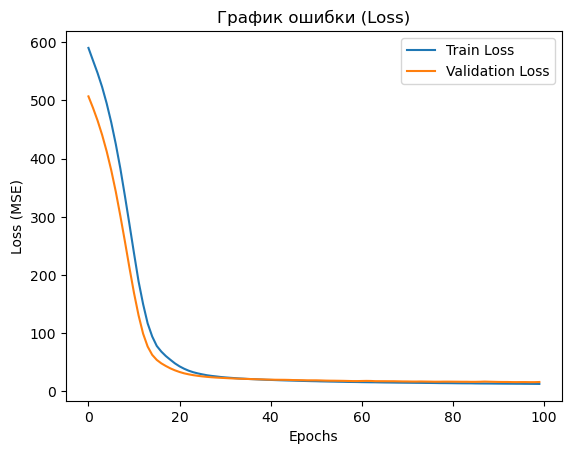

In [12]:
# График ошибки
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('График ошибки (Loss)')
plt.show()

### Графики почти совпадают следовательно переобучения нет.

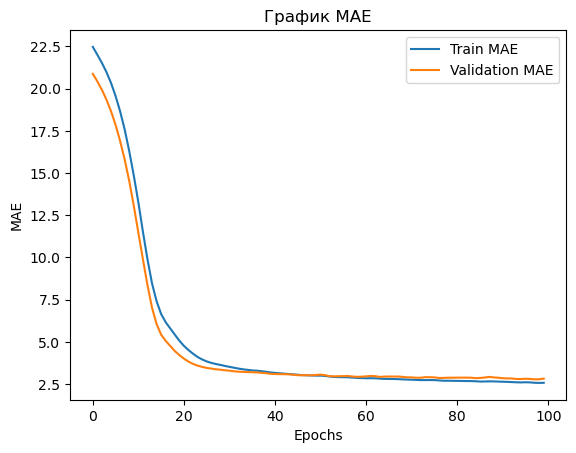

In [13]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('График MAE')
plt.show()

### Графики почти совпадают следовательно переобучения нет.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


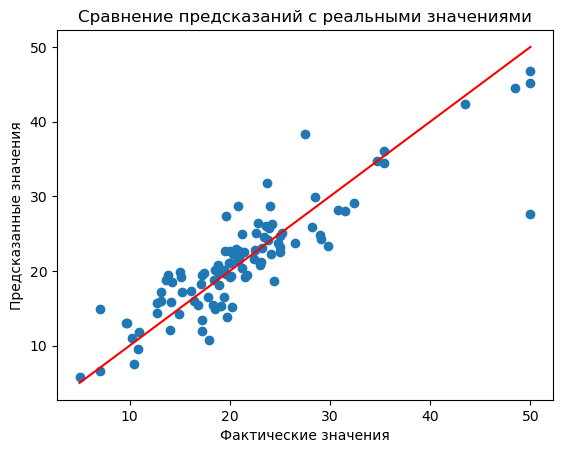

In [14]:
y_pred = model.predict(X_val_scaled)

plt.scatter(y_val, y_pred)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказаний с реальными значениями')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red')  # Линия идеального предсказания
plt.show()

### Точки раскиданы и есть выбросы (например, на отметке 50) → модель иногда сильно ошибается.
Большинство точек кучно, но есть выбросы → модель в целом адекватная, но в отдельных случаях даёт неточные предсказания.

Как исправить:
Попробовать другой лосс (Huber вместо MSE).
Попробовать логарифмирование целевой переменной (y = log(y))
Проверить данные

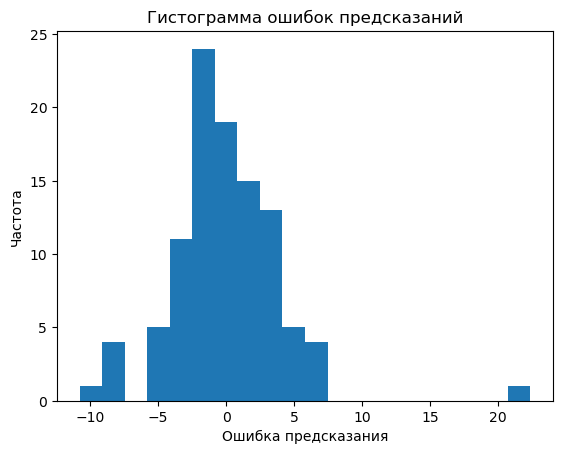

In [15]:
errors = y_val - y_pred.flatten()

plt.hist(errors, bins=20)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок предсказаний')
plt.show()

### Большая часть ошибок лежит в диапазоне [-10, 10] → модель стабильно предсказывает.
Один выброс на 20 – значит, модель где-то сильно ошиблась (скорее всего, на очень дорогом доме).
Распределение нормальное, но есть выбросы.

Как исправить:
Попробовать другой лосс (Huber вместо MSE).
Попробовать логарифмирование целевой переменной (y = log(y))
Проверить данные

### Из изследования датасета по квартирам Бостона (homework10). Мы пришли к выводу что дорогие квартиры 50+ по цене - не попадают в нормально распределение т.к часто является иторическим/культурными строениями котрым могут быть присущи любые фичи

In [16]:
total_houses = df_original.shape[0]  # всего строк(домов) в датасете
count_houses = (df_original[13] >= 50).sum() # выбираем те что дороже 50

print(f"Всего домов: {total_houses}")
print(f"Количество домов с ценой >= 50 тыс.: {count_houses}")
print(f"Процент таких домов: {count_houses / total_houses * 100:.2f}%")

Всего домов: 506
Количество домов с ценой >= 50 тыс.: 16
Процент таких домов: 3.16%


### Домов всего 3.16%, поэтому попробуем исключить их из расчета

In [17]:
# Удаляем выбросы
mask = df_original[13] < 50
X_filtered = df_original.loc[mask].drop(columns=[3, 7, 13])  # Удаляем ненужные столбцы
y_filtered = df_original.loc[mask, 13]  # Оставляем только цены < 50

In [18]:
print("X_val_scaled shape:", X_filtered.shape)
print("y_val_filtered shape:", y_filtered.shape)

X_val_scaled shape: (490, 11)
y_val_filtered shape: (490,)


In [19]:
# Разделяем данные на train/test после фильтрации
X_train_filtered, X_val_filtered, y_train_filtered, y_val_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42)


In [20]:
scaler = StandardScaler()
X_train_scaled_filtered = scaler.fit_transform(X_train_filtered)
X_val_scaled_filtered = scaler.transform(X_val_filtered)

In [21]:
# Создаём модель
model_filtered = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)), # Входной слой
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой
])

# Компиляция модели
model_filtered.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.Huber(), metrics=['mae'])

# Функции callbacks
callbacks_filtered = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_boston_filtered.keras', monitor='val_loss', 
                    save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
]

# История обучения хранится в объекте history
history = model.fit(X_train_scaled_filtered, y_train_filtered, epochs=100, batch_size=64, 
                    validation_data=(X_val_scaled_filtered, y_val_filtered), 
                    callbacks=callbacks_filtered, verbose=1)

# Оценка на тесте
test_loss_filtered, test_mae_filtered = model.evaluate(
    X_val_scaled_filtered, y_val_filtered, verbose=1)
print("\nСредняя абсолютная ошибка (MAE):", test_mae_filtered)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - loss: 11.7711 - mae: 2.6586 - val_loss: 9.9784 - val_mae: 2.4014 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.8376 - mae: 2.4768 - val_loss: 9.7560 - val_mae: 2.3390 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.2619 - mae: 2.3770 - val_loss: 9.7348 - val_mae: 2.3121 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.8099 - mae: 2.2858 - val_loss: 9.6849 - val_mae: 2.3033 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7968 - mae: 2.3840 - val_loss: 9.6737 - val_mae: 2.3219 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6281 - mae: 2.3200 - val_loss: 9.6508 - val_mae: 2.3174 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8786 - mae: 2.3268 - val_loss: 9.6472 - val_mae: 2.3270 - learning_rate: 0.0010
Epoch 8/100
7/7 ━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


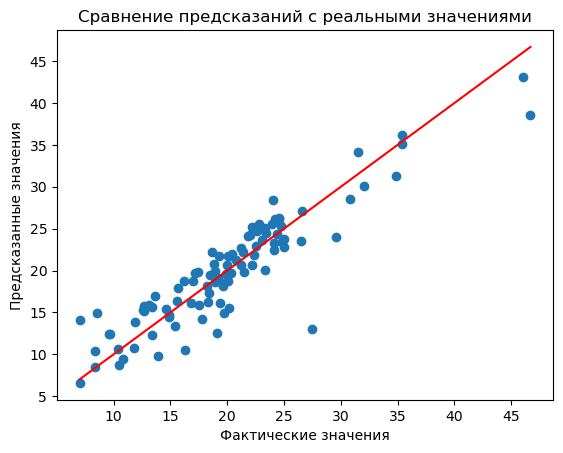

In [22]:
y_pred_filtered = model.predict(X_val_scaled_filtered)

plt.scatter(y_val_filtered, y_pred_filtered)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказаний с реальными значениями')
plt.plot([min(y_val_filtered), max(y_val_filtered)], [min(y_val_filtered), max(y_val_filtered)], color='red')  # Линия идеального предсказания
plt.show()

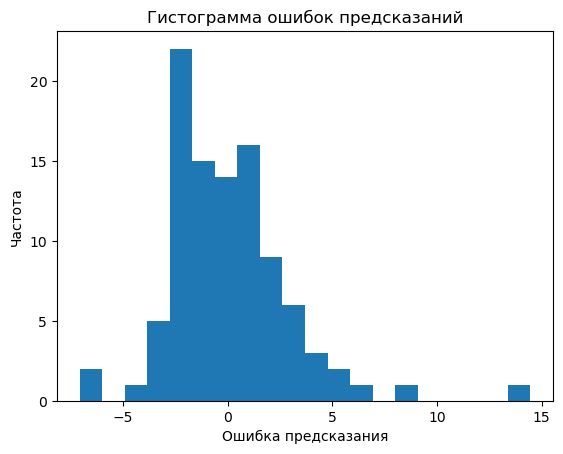

In [23]:
errors = y_val_filtered - y_pred_filtered.flatten()

plt.hist(errors, bins=20)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок предсказаний')
plt.show()

### Даные по графикам стали кучне, но выбросы все равно наблюдаются. Попробуем MinMaxScaler()

In [24]:
# Удаляем выбросы
mask = df_original[13] < 50
X_filtered = df_original.loc[mask].drop(columns=[3, 7, 13])  # Удаляем ненужные столбцы
y_filtered = df_original.loc[mask, 13]  # Оставляем только цены < 50

In [25]:
print("X_val_scaled shape:", X_filtered.shape)
print("y_val_filtered shape:", y_filtered.shape)

X_val_scaled shape: (490, 11)
y_val_filtered shape: (490,)


In [26]:
# Разделяем данные на train/test после фильтрации
X_train_filtered_mm, X_val_filtered_mm, y_train_filtered_mm, y_val_filtered_mm = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)


In [27]:
scaler = MinMaxScaler()

# Применяем нормализацию (фитим на тренировочных данных, трансформируем и тестовые)
X_train_scaled_filtered_mm = scaler.fit_transform(X_train_filtered_mm)
X_val_scaled_filtered_mm = scaler.transform(X_val_filtered_mm)

In [28]:
# Создаём модель
model_filtered_mm = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)), # Входной слой
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой
])

# Компиляция модели
model_filtered_mm.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.Huber(), metrics=['mae'])

# Функции callbacks
callbacks_filtered_mm = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_boston_filtered.keras', monitor='val_loss', 
                    save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
]

# История обучения хранится в объекте history
history_mm = model.fit(X_train_scaled_filtered_mm, y_train_filtered_mm, epochs=100, batch_size=64, 
                    validation_data=(X_val_scaled_filtered_mm, y_val_filtered_mm), 
                    callbacks=callbacks_filtered_mm, verbose=1)
# Оценка на тесте
test_loss_filtered_mm, test_mae_filtered_mm = model.evaluate(
    X_val_scaled_filtered_mm, y_val_filtered_mm, verbose=1)
print("\nСредняя абсолютная ошибка (MAE):", test_mae_filtered_mm)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 101.2647 - mae: 8.0333 - val_loss: 68.7173 - val_mae: 6.4214 - learning_rate: 6.2500e-05
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 102.7896 - mae: 7.8467 - val_loss: 62.9891 - val_mae: 6.0866 - learning_rate: 6.2500e-05
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 95.1754 - mae: 7.5082 - val_loss: 57.3905 - val_mae: 5.7544 - learning_rate: 6.2500e-05
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 73.3370 - mae: 6.5227 - val_loss: 52.7327 - val_mae: 5.4525 - learning_rate: 6.2500e-05
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 76.7572 - mae: 6.6119 - val_loss: 48.8441 - val_mae: 5.1813 - learning_rate: 6.2500e-05
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 62.4764 - mae: 5.9308 - val_loss: 45.8933 - val_mae: 4.9583 - learning_rate: 6.2500e-05
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 74.3159 - mae: 6.2681 - val_loss: 43.5116 - val_mae: 4.7699 - learning

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


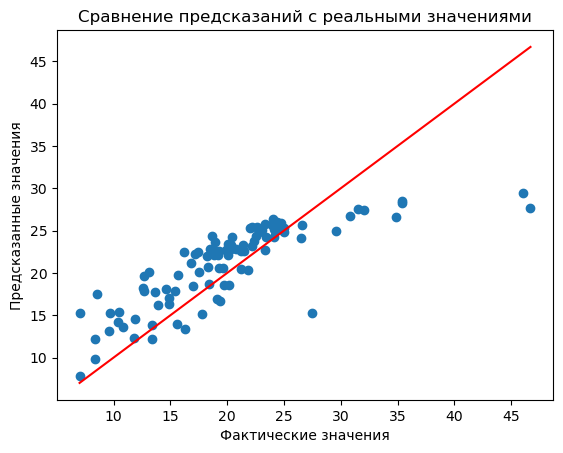

In [29]:
y_pred_filtered_mm = model.predict(X_val_scaled_filtered_mm)

plt.scatter(y_val_filtered_mm, y_pred_filtered_mm)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказаний с реальными значениями')
plt.plot([min(y_val_filtered_mm), max(y_val_filtered_mm)], [min(y_val_filtered_mm), max(y_val_filtered_mm)], color='red')  # Линия идеального предсказания
plt.show()

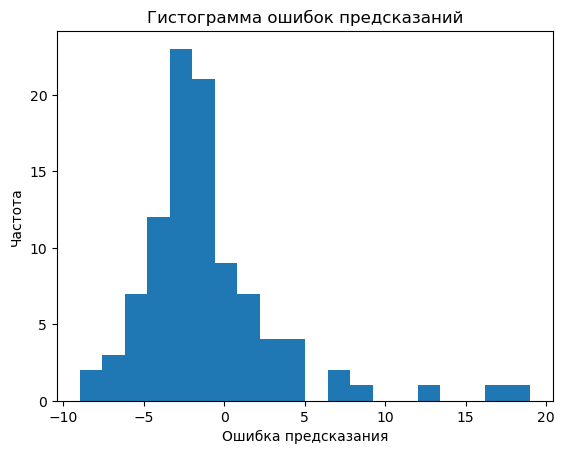

In [30]:
errors = y_val_filtered_mm - y_pred_filtered_mm.flatten()

plt.hist(errors, bins=20)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок предсказаний')
plt.show()

## Вывод: Изменеие метода нормализации на MinMax только ухудшило модельи распределение.

### Вернем метод StandardScaler но попробуем про логорифмировать данные

In [31]:
mask = df_original[13] < 50
X_filtered_ = df_original.loc[mask].drop(columns=[3, 7, 13])  # Удаляем ненужные столбцы
y_filtered = df_original.loc[mask, 13]  # Оставляем только цены < 50

# Разделяем данные на train/test после фильтрации
X_train_filtered_log, X_val_filtered_log, y_train_filtered_log, y_val_filtered_log = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42)

y_train_log_filtered= np.log(y_train_filtered_log + 1)
y_val_log_filtered = np.log(y_val_filtered_log + 1) 

# Нормализация (применяем только после разбиения!)
scaler = StandardScaler()
X_train_scaled_filtered_log = scaler.fit_transform(X_train_filtered_log)
X_val_scaled_filtered_log = scaler.transform(X_val_filtered_log)

In [53]:
# Создаём модель
model_filtered_log = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)), # Входной слой
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой
])

# Компиляция модели
model_filtered_log.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.Huber(), metrics=['mae'])

# Функции callbacks
callbacks_filtered_log = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_boston_log.keras', monitor='val_loss', 
                    save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
]

# История обучения хранится в объекте history
history_log = model_filtered_log.fit(X_train_scaled_filtered_log, y_train_filtered_log, epochs=100, batch_size=64, 
                    validation_data=(X_val_scaled_filtered_log, y_val_filtered_log), 
                    callbacks=callbacks_filtered_log, verbose=1)

# Логарифмированные ошибки
test_loss_filtered_log, test_mae_filtered_log = model.evaluate(
    X_val_scaled_filtered_log, y_val_filtered_log, verbose=1
)
print("\nСредняя абсолютная ошибка (MAE) (в логарифмах):", test_mae_filtered_log)

# Делаем предсказание
y_pred_log = model_filtered_log.predict(X_val_scaled_filtered_log)

# Преобразуем в одномерный массив
y_pred_log = y_pred_log.flatten()  

# Обратное логарифмирование
y_pred = np.exp(y_pred_log) - 1
y_true = np.exp(y_val_filtered_log) - 1

# Считаем MAE в исходных величинах
mae_real = np.mean(np.abs(y_pred - y_true))
print("Средняя абсолютная ошибка (MAE) в деньгах:", mae_real)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 259ms/step - loss: 21.3393 - mae: 21.8393 - val_loss: 18.8290 - val_mae: 19.3290 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.7719 - mae: 21.2719 - val_loss: 18.3495 - val_mae: 18.8495 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 20.0461 - mae: 20.5461 - val_loss: 17.8020 - val_mae: 18.3020 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 19.2990 - mae: 19.7984 - val_loss: 17.1354 - val_mae: 17.6354 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.9570 - mae: 19.4568 - val_loss: 16.3233 - val_mae: 16.8211 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 18.2255 - mae: 18.7254 - val_loss: 15.3649 - val_mae: 15.8649 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.9551 - mae: 17.4536 - val_loss: 14.2273 - val_mae: 14.7185 - learning_rate: 0.

Text(0.5, 1.0, 'График ошибки на обучении и валидации')

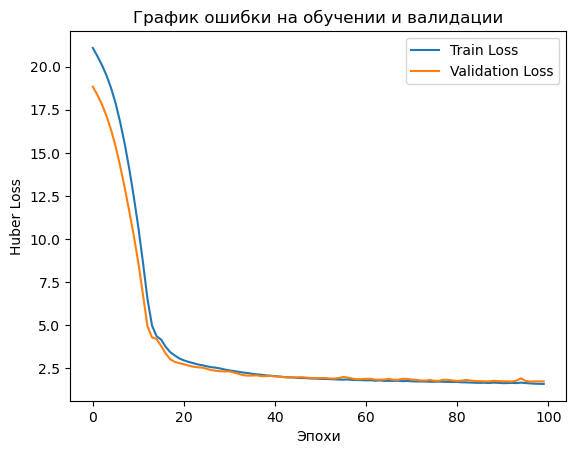

In [54]:
plt.plot(history_log.history['loss'], label='Train Loss')
plt.plot(history_log.history['val_loss'], label='Validation Loss')
plt.xlabel('Эпохи')
plt.ylabel('Huber Loss')
plt.legend()
plt.title("График ошибки на обучении и валидации")

In [34]:
print("Мин/Макс y_train_filtered_log:", y_train_filtered_log.min(), y_train_filtered_log.max())

Мин/Макс y_train_filtered_log: 5.0 48.8


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


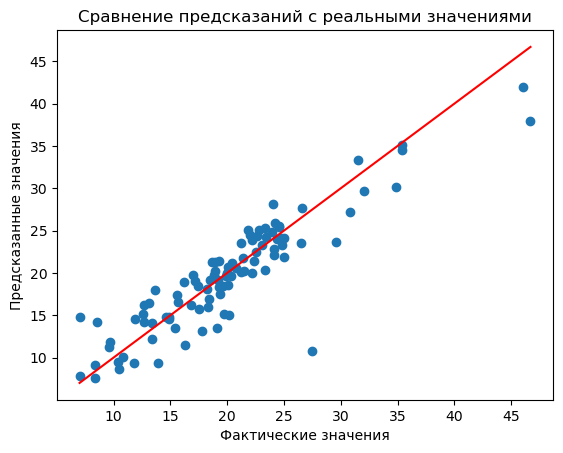

In [55]:
y_pred_filtered_log = model_filtered_log.predict(X_val_scaled_filtered_log)

plt.scatter(y_val_filtered_log, y_pred_filtered_log)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказаний с реальными значениями')
plt.plot([min(y_val_filtered_log), max(y_val_filtered_log)], [min(y_val_filtered_log), max(y_val_filtered_log)], color='red')  # Линия идеального предсказания
plt.show()

# Раз диапазон y_train_filtered_log от 5.0 до 48.8, то логарифмирование работает нормально но все еще есть выбросы. Попролбуем увеличить число нейронов в модели и степень обучения

In [56]:
# Создаём модель
model_filtered_log2 = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled_filtered_log.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой
])

# Компиляция модели
model_filtered_log2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
              loss=tf.keras.losses.Huber(), metrics=['mae'])

# Функции callbacks
callbacks_filtered_log2 = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_boston_log2.keras', monitor='val_loss', 
                    save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
]

# История обучения хранится в объекте history
history_log2 = model_filtered_log2.fit(X_train_scaled_filtered_log, y_train_filtered_log, epochs=100, batch_size=64, 
                    validation_data=(X_val_scaled_filtered_log, y_val_filtered_log), 
                    callbacks=callbacks_filtered_log, verbose=1)

# Логарифмированные ошибки
test_loss_filtered_log2, test_mae_filtered_log2 = model_filtered_log2.evaluate(
    X_val_scaled_filtered_log, y_val_filtered_log, verbose=1
)
print("\nСредняя абсолютная ошибка (MAE) (в логарифмах):", test_mae_filtered_log2)

# Делаем предсказание
y_pred_log2 = model_filtered_log2.predict(X_val_scaled_filtered_log)

# Преобразуем в одномерный массив
y_pred_log2 = y_pred_log2.flatten()  

# Обратное логарифмирование
y_pred2 = np.exp(y_pred_log2) - 1
y_true2 = np.exp(y_val_filtered_log) - 1

# Считаем MAE в исходных величинах
mae_real2 = np.mean(np.abs(y_pred2 - y_true2))
print("Средняя абсолютная ошибка (MAE) в деньгах:", mae_real2)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 323ms/step - loss: 19.7762 - mae: 20.2760 - val_loss: 8.2155 - val_mae: 8.7148 - learning_rate: 0.0100
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0337 - mae: 7.5154 - val_loss: 4.6008 - val_mae: 5.0795 - learning_rate: 0.0100
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.4083 - mae: 5.8943 - val_loss: 3.7488 - val_mae: 4.2333 - learning_rate: 0.0100
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.9111 - mae: 4.3807 - val_loss: 3.5718 - val_mae: 4.0380 - learning_rate: 0.0100
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4379 - mae: 3.9156 - val_loss: 4.5153 - val_mae: 4.9924 - learning_rate: 0.0100
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1692 - mae: 3.6487 - val_loss: 2.6408 - val_mae: 3.0950 - learning_rate: 0.0100
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5936 - mae: 3.0591 - val_loss: 2.2824 - val_mae: 2.7414 - learning_rate: 0.0100
Epoch 8/100
7/7 ━━━━━━━

Text(0.5, 1.0, 'График ошибки на обучении и валидации')

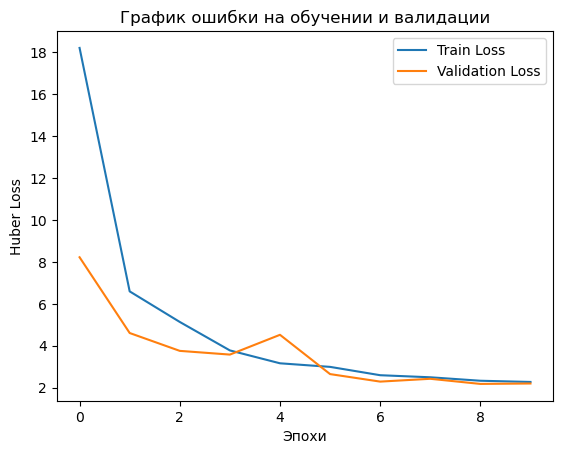

In [57]:
plt.plot(history_log2.history['loss'], label='Train Loss')
plt.plot(history_log2.history['val_loss'], label='Validation Loss')
plt.xlabel('Эпохи')
plt.ylabel('Huber Loss')
plt.legend()
plt.title("График ошибки на обучении и валидации")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


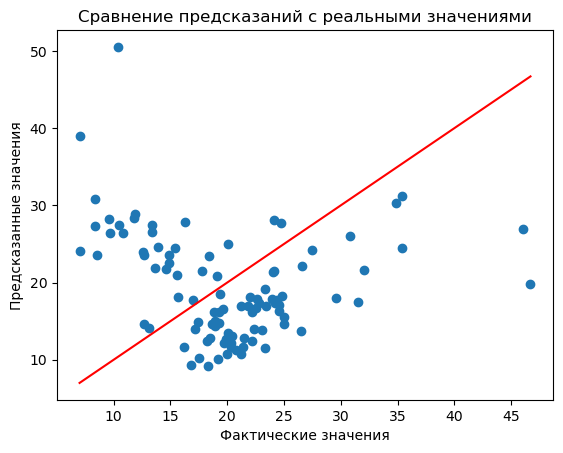

In [58]:
y_pred_filtered_log2 = model_filtered_log2.predict(X_val_scaled_filtered_log)

plt.scatter(y_val_filtered_log, y_pred_filtered_log2)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказаний с реальными значениями')
plt.plot([min(y_val_filtered_log), max(y_val_filtered_log)], [min(y_val_filtered_log), max(y_val_filtered_log)], color='red')  # Линия идеального предсказания
plt.show()

# Увеличение числа нейронов слабо повлияло на модель. Т.е логарифмирование этих данных -ошибка. Наиболее действующую модель мы получили при StandardScaler и Huber Loss и исключеннии данных о дорогих домах из расчетов.

In [37]:
# Удаляем выбросы
mask = df_original[13] < 50
X_filtered = df_original.loc[mask].drop(columns=[3, 7, 13])  # Удаляем ненужные столбцы
y_filtered = df_original.loc[mask, 13]  # Оставляем только цены < 50

In [38]:
# Разделяем данные на train/test после фильтрации
X_train_filtered, X_val_filtered, y_train_filtered, y_val_filtered = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42)


In [39]:
# Обучаем модель
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_filtered, y_train_filtered)

# Предсказываем
y_pred_rf = rf.predict(X_val_filtered)

# Считаем MAE
mae_rf = mean_absolute_error(y_val_filtered, y_pred_rf)
print(f"Средняя абсолютная ошибка (MAE) для RandomForest: {mae_rf:.2f}")

Средняя абсолютная ошибка (MAE) для RandomForest: 1.86


In [40]:
# Обучаем модель
rf2 = RandomForestRegressor(n_estimators=200, random_state=42)
rf2.fit(X_train_filtered, y_train_filtered)

# Предсказываем
y_pred_rf2 = rf.predict(X_val_filtered)

# Считаем MAE
mae_rf = mean_absolute_error(y_val_filtered, y_pred_rf2)
print(f"Средняя абсолютная ошибка (MAE) для RandomForest: {mae_rf:.2f}")

Средняя абсолютная ошибка (MAE) для RandomForest: 1.86


In [41]:
importances = rf.feature_importances_
feature_names = X_train.columns
sorted(zip(importances, feature_names), reverse=True)

[(0.46744923111620035, 5),
 (0.35627176394287774, 12),
 (0.056069063583921996, 0),
 (0.028082303187015514, 10),
 (0.024532509952402557, 4),
 (0.019475924916380068, 6),
 (0.017185045700477585, 11),
 (0.015313896644488512, 9),
 (0.009195393591184766, 2),
 (0.004371019242594219, 8),
 (0.0020538481224567427, 1)]

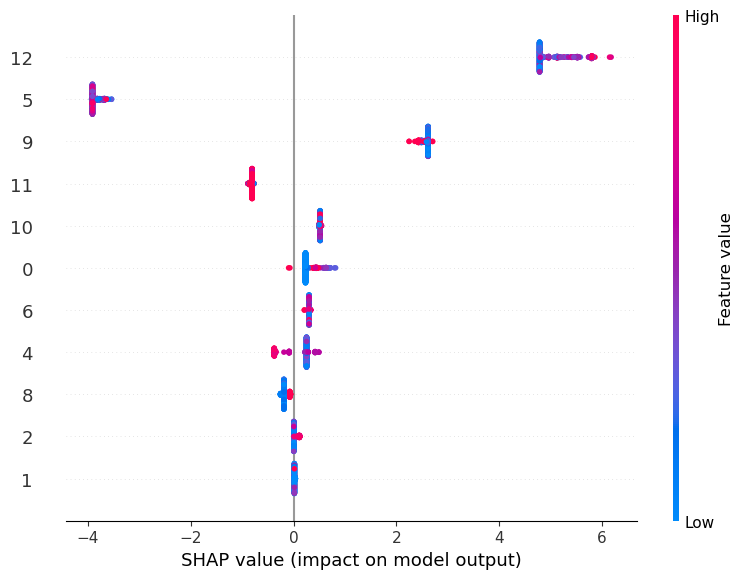

In [43]:
# Создаём объект SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_scaled_filtered)

# Визуализируем важность признаков
X_train_scaled_filtered_df = pd.DataFrame(X_train_scaled_filtered, columns=X_train_filtered.columns)

shap.summary_plot(shap_values, X_train_scaled_filtered_df, feature_names=X_train_filtered.columns)


Мы получили что признаки 1,8,2 имеют важность менее 1%. Попробуем их удалить из модели

### Вывод лес регрессий дает ошибку даже меньше чем модель

## Исключим признаки 1,8,2  из модели и снова ее обучим

In [44]:
# Удаляем выбросы
mask = df_original[13] < 50
X_filtered_all = df_original.loc[mask].drop(columns=[1, 8, 2, 3, 7, 13])  # Удаляем ненужные столбцы
y_filtered_all = df_original.loc[mask, 13]  # Оставляем только цены < 50

In [45]:
# Разделяем данные на train/test после фильтрации
X_train_filtered_all, X_val_filtered_all, y_train_filtered_all, y_val_filtered_all = train_test_split(
    X_filtered_all, y_filtered_all, test_size=0.2, random_state=42)


In [46]:
scaler = StandardScaler()
X_train_scaled_filtered_all = scaler.fit_transform(X_train_filtered_all)
X_val_scaled_filtered_all = scaler.transform(X_val_filtered_all)

In [47]:
print("X_train_scaled_filtered_all:", X_train_scaled_filtered_all.shape)
print("y_train_filtered_all:", y_train_filtered_all.shape)
print("X_val_scaled_filtered_all:", X_val_scaled_filtered_all.shape)
print("y_val_filtered_all:", y_val_filtered_all.shape)

X_train_scaled_filtered_all: (392, 8)
y_train_filtered_all: (392,)
X_val_scaled_filtered_all: (98, 8)
y_val_filtered_all: (98,)


In [49]:
# del model_filtered_all
# keras.backend.clear_session()

In [50]:
# Создаём модель
model_filtered_all = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled_filtered_all.shape[1],)), # Входной слой
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Выходной слой
])

# Компиляция модели
model_filtered_all.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              loss=tf.keras.losses.Huber(), metrics=['mae'])

# Функции callbacks
callbacks_filtered_all = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_boston_filtered.keras', monitor='val_loss', 
                    save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6),
]

# История обучения хранится в объекте history
history_all = model_filtered_all.fit(X_train_scaled_filtered_all, y_train_filtered_all, 
                                     epochs=100, batch_size=64, 
                                     validation_data=(X_val_scaled_filtered_all, y_val_filtered_all), 
                                     callbacks=callbacks_filtered_all, verbose=1)
# Оценка на тесте
test_loss_filtered_all, test_mae_filtered_all = model_filtered_all.evaluate(
    X_val_scaled_filtered_all, y_val_filtered_all, verbose=1)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 294ms/step - loss: 21.6729 - mae: 22.1729 - val_loss: 19.1208 - val_mae: 19.6208 - learning_rate: 0.0010
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.2280 - mae: 21.7280 - val_loss: 18.7089 - val_mae: 19.2089 - learning_rate: 0.0010
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 20.6789 - mae: 21.1789 - val_loss: 18.2816 - val_mae: 18.7816 - learning_rate: 0.0010
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 19.9604 - mae: 20.4603 - val_loss: 17.8010 - val_mae: 18.3010 - learning_rate: 0.0010
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.7910 - mae: 20.2907 - val_loss: 17.2428 - val_mae: 17.7366 - learning_rate: 0.0010
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.3237 - mae: 19.8227 - val_loss: 16.6367 - val_mae: 17.1365 - learning_rate: 0.0010
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.4822 - mae: 18.9790 - val_loss: 15.9362 - val_mae: 16.4329 - learning_rate: 0.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


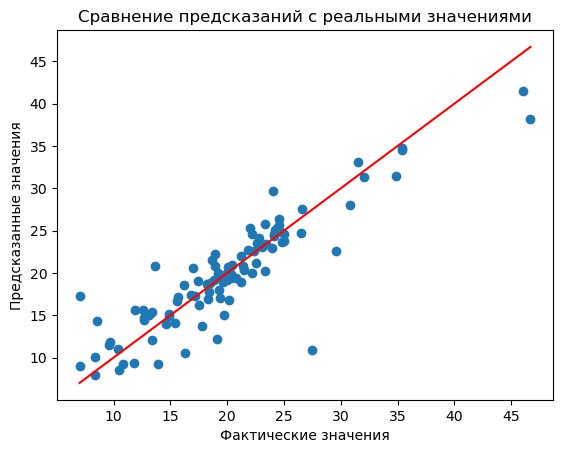

In [51]:
y_pred_filtered_all = model_filtered_all.predict(X_val_scaled_filtered_all)

plt.scatter(y_val_filtered_all, y_pred_filtered_all)
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Сравнение предсказаний с реальными значениями')
plt.plot([min(y_val_filtered_all), max(y_val_filtered_all)], [min(y_val_filtered_all), max(y_val_filtered_all)], color='red')  # Линия идеального предсказания
plt.show()

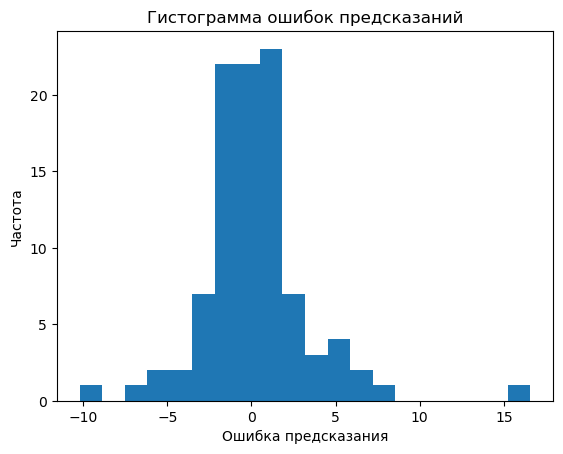

In [52]:
errors = y_val_filtered_all - y_pred_filtered_all.flatten()

plt.hist(errors, bins=20)
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Гистограмма ошибок предсказаний')
plt.show()

# Распеределение данных стало более симметричным и данные лучше прижмаются к идеальному предстказанию